<a href="https://colab.research.google.com/github/gatewj/Stop_Sign_Identification/blob/main/model_two_withTensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Running this cell will provide you with a token to link your drive to this notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

# Walk through the images director and the number of files
for dirpath, dirnames, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/IBM PyTorch/final_model/model2/images_dir/'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '/content/drive/MyDrive/Colab Notebooks/IBM PyTorch/final_model/model2/images_dir/'.
There are 2 directories and 0 images in '/content/drive/MyDrive/Colab Notebooks/IBM PyTorch/final_model/model2/images_dir/train'.
There are 0 directories and 77 images in '/content/drive/MyDrive/Colab Notebooks/IBM PyTorch/final_model/model2/images_dir/train/stop'.
There are 0 directories and 80 images in '/content/drive/MyDrive/Colab Notebooks/IBM PyTorch/final_model/model2/images_dir/train/not_stop'.
There are 2 directories and 0 images in '/content/drive/MyDrive/Colab Notebooks/IBM PyTorch/final_model/model2/images_dir/test'.
There are 0 directories and 20 images in '/content/drive/MyDrive/Colab Notebooks/IBM PyTorch/final_model/model2/images_dir/test/not_stop'.
There are 0 directories and 20 images in '/content/drive/MyDrive/Colab Notebooks/IBM PyTorch/final_model/model2/images_dir/test/stop'.


In [3]:
# Another way to find out how many images are in a file
num_training_images = len(os.listdir('/content/drive/MyDrive/Colab Notebooks/IBM PyTorch/final_model/model2/images_dir/train/stop'))
num_training_images

77

In [4]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np

data_dir = pathlib.Path('/content/drive/MyDrive/Colab Notebooks/IBM PyTorch/final_model/model2/images_dir/train/')  # tuen our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))  # created a list of class_names from the subdirectories

# print the class names
print(class_names)

['not_stop' 'stop']


In [5]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")  #Print the shape of the image

  return img

Image shape: (645, 483, 3)


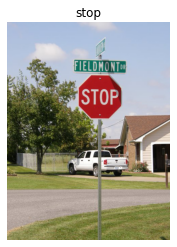

In [6]:
# View a random image from the training dataset
dir = '/content/drive/MyDrive/Colab Notebooks/IBM PyTorch/final_model/model2/images_dir/train/'

img = view_random_image(target_dir=dir, 
                        target_class='stop')

Image shape: (768, 1024, 3)


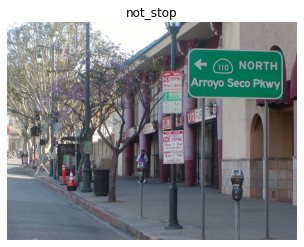

In [7]:
# View a random image from the training dataset
dir = '/content/drive/MyDrive/Colab Notebooks/IBM PyTorch/final_model/model2/images_dir/train/'

img = view_random_image(target_dir=dir, 
                        target_class='not_stop')

In [8]:
# View the img (actually just a big array/tensor)
img

array([[[255, 250, 252],
        [255, 253, 254],
        [253, 253, 253],
        ...,
        [156, 140, 140],
        [158, 144, 143],
        [160, 146, 145]],

       [[255, 251, 252],
        [254, 252, 253],
        [253, 253, 253],
        ...,
        [155, 141, 140],
        [152, 141, 139],
        [153, 142, 140]],

       [[251, 249, 250],
        [255, 253, 254],
        [254, 254, 254],
        ...,
        [155, 144, 142],
        [154, 144, 143],
        [158, 148, 147]],

       ...,

       [[104, 123, 137],
        [105, 123, 137],
        [107, 120, 136],
        ...,
        [103, 105, 117],
        [104, 106, 118],
        [106, 106, 118]],

       [[103, 122, 136],
        [104, 122, 136],
        [107, 120, 136],
        ...,
        [105, 105, 115],
        [105, 103, 114],
        [106, 105, 113]],

       [[105, 124, 138],
        [104, 122, 136],
        [107, 120, 136],
        ...,
        [104, 104, 112],
        [101, 100, 108],
        [105, 102, 109]]

In [9]:
# View the image shape
img.shape

(768, 1024, 3)

many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to scale (also referred to as normalize) their pixel values by dividing the image arrays by 255.

In [10]:
# Get all the pixel values between 0 & 1
img/255.

array([[[1.        , 0.98039216, 0.98823529],
        [1.        , 0.99215686, 0.99607843],
        [0.99215686, 0.99215686, 0.99215686],
        ...,
        [0.61176471, 0.54901961, 0.54901961],
        [0.61960784, 0.56470588, 0.56078431],
        [0.62745098, 0.57254902, 0.56862745]],

       [[1.        , 0.98431373, 0.98823529],
        [0.99607843, 0.98823529, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        ...,
        [0.60784314, 0.55294118, 0.54901961],
        [0.59607843, 0.55294118, 0.54509804],
        [0.6       , 0.55686275, 0.54901961]],

       [[0.98431373, 0.97647059, 0.98039216],
        [1.        , 0.99215686, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.60784314, 0.56470588, 0.55686275],
        [0.60392157, 0.56470588, 0.56078431],
        [0.61960784, 0.58039216, 0.57647059]],

       ...,

       [[0.40784314, 0.48235294, 0.5372549 ],
        [0.41176471, 0.48235294, 0.5372549 ],
        [0.41960784, 0

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255) 

# Setup the train and test directories
train_dir = '/content/drive/MyDrive/Colab Notebooks/IBM PyTorch/final_model/model2/images_dir/train/'
test_dir = '/content/drive/MyDrive/Colab Notebooks/IBM PyTorch/final_model/model2/images_dir/test/'

# Import data from directories and turn it into batches
# Import data from diectories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               seed=42)

Found 157 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


## Baseline Model

A baseline is a score or evaluation metric you want to try and beat. Usually you'll start with a simple model, create a baseline and try to beat it by increasing the complexity of the model.

In [12]:
# Create a CNN model
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
5/5 [==============================] - 53s 11s/step - loss: 0.8225 - accuracy: 0.5223 - val_loss: 0.8100 - val_accuracy: 0.5000
Epoch 2/5
5/5 [==============================] - 19s 4s/step - loss: 0.7209 - accuracy: 0.5159 - val_loss: 0.6941 - val_accuracy: 0.5000
Epoch 3/5
5/5 [==============================] - 20s 4s/step - loss: 0.6747 - accuracy: 0.6051 - val_loss: 0.6940 - val_accuracy: 0.5000
Epoch 4/5
5/5 [==============================] - 19s 3s/step - loss: 0.6627 - accuracy: 0.6815 - val_loss: 0.6961 - val_accuracy: 0.5000
Epoch 5/5
5/5 [==============================] - 19s 4s/step - loss: 0.6054 - accuracy: 0.8790 - val_loss: 0.7781 - val_accuracy: 0.5000


In [13]:
# Check out the layers in our model
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [14]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [15]:
# Create the 2nd model (a 3 layer Convolutional Neural Network)
model_2 = Sequential([
  Conv2D(filters=10, 
         kernel_size=3, 
         strides=1,
         padding='valid',
         activation='relu', 
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])

In [16]:
# Compile the model
model_2.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [17]:
# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
5/5 [==============================] - 24s 5s/step - loss: 0.6367 - accuracy: 0.6433 - val_loss: 0.8357 - val_accuracy: 0.5000
Epoch 2/5
5/5 [==============================] - 23s 5s/step - loss: 0.3222 - accuracy: 0.8790 - val_loss: 1.0465 - val_accuracy: 0.5000
Epoch 3/5
5/5 [==============================] - 21s 4s/step - loss: 0.1774 - accuracy: 0.9490 - val_loss: 1.3440 - val_accuracy: 0.5000
Epoch 4/5
5/5 [==============================] - 20s 4s/step - loss: 0.0742 - accuracy: 0.9809 - val_loss: 1.6694 - val_accuracy: 0.5000
Epoch 5/5
5/5 [==============================] - 21s 4s/step - loss: 0.0273 - accuracy: 1.0000 - val_loss: 2.0671 - val_accuracy: 0.5000


## Evaluate the model

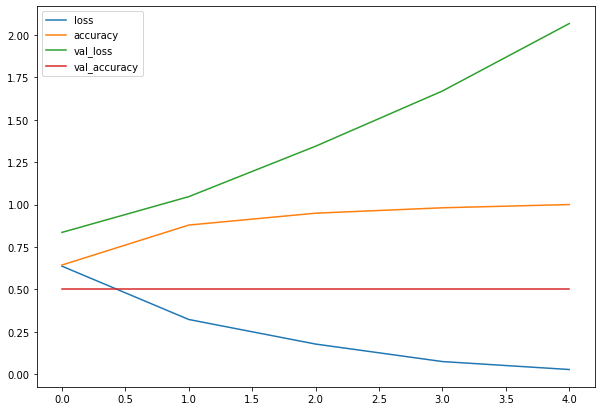

In [18]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_2.history).plot(figsize=(10,7))

In [19]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

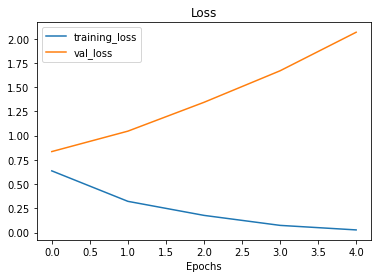

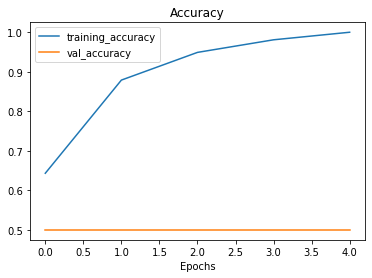

In [20]:
# Check out the loss curves of model_2
plot_loss_curves(history_2)

In [21]:
# Check out our model's architecture
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 475240)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Model 3

model_3 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

model_3.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
5/5 [==============================] - 15s 3s/step - loss: 0.7543 - accuracy: 0.5796 - val_loss: 0.9286 - val_accuracy: 0.5000
Epoch 2/5
5/5 [==============================] - 13s 3s/step - loss: 0.7665 - accuracy: 0.5414 - val_loss: 0.6957 - val_accuracy: 0.5000
Epoch 3/5
5/5 [==============================] - 13s 3s/step - loss: 0.7008 - accuracy: 0.5096 - val_loss: 0.7099 - val_accuracy: 0.5000
Epoch 4/5
5/5 [==============================] - 13s 3s/step - loss: 0.6929 - accuracy: 0.5414 - val_loss: 0.6942 - val_accuracy: 0.5000
Epoch 5/5
5/5 [==============================] - 13s 3s/step - loss: 0.6833 - accuracy: 0.5541 - val_loss: 0.7069 - val_accuracy: 0.5000


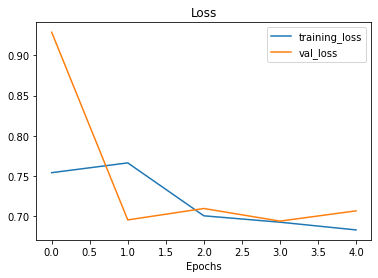

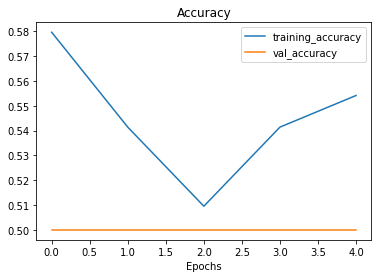

In [23]:
# Plot loss curves of model_3 results
plot_loss_curves(history_3)

## Data Augmentation

Data augmentation is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Doing this simulates the kind of data a model might be used on in the real world.

In [24]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,      # rotate the image slightly
                                             shear_range=0.2,         # shear the image
                                             zoom_range=0.2,          # zoom into the image
                                             width_shift_range=0.2,   # shift the image width ways
                                             height_shift_range=0.2,  # shift the image height ways
                                             horizontal_flip=True)    # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [25]:
# Setup the train and test directories
train_dir = '/content/drive/MyDrive/Colab Notebooks/IBM PyTorch/final_model/model2/images_dir/train/'
test_dir = '/content/drive/MyDrive/Colab Notebooks/IBM PyTorch/final_model/model2/images_dir/test/'

# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 157 images belonging to 2 classes.
Non-augmented training images:
Found 157 images belonging to 2 classes.
Unchanged test images:
Found 40 images belonging to 2 classes.


In [26]:
# Create the model (same as model_5)
model_4 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_4 = model_4.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
5/5 [==============================] - 17s 3s/step - loss: 0.9479 - accuracy: 0.3057 - val_loss: 0.7602 - val_accuracy: 0.5000
Epoch 2/5
5/5 [==============================] - 14s 2s/step - loss: 0.8120 - accuracy: 0.1529 - val_loss: 0.6915 - val_accuracy: 0.5000
Epoch 3/5
5/5 [==============================] - 14s 3s/step - loss: 0.6974 - accuracy: 0.5096 - val_loss: 0.6913 - val_accuracy: 0.5000
Epoch 4/5
5/5 [==============================] - 14s 3s/step - loss: 0.6947 - accuracy: 0.5096 - val_loss: 0.6889 - val_accuracy: 0.5250
Epoch 5/5
5/5 [==============================] - 14s 3s/step - loss: 0.6960 - accuracy: 0.5287 - val_loss: 0.6785 - val_accuracy: 0.7250


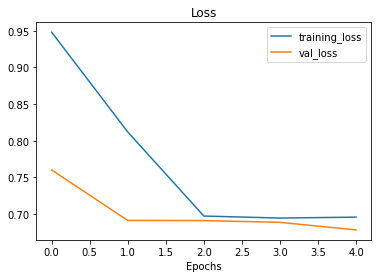

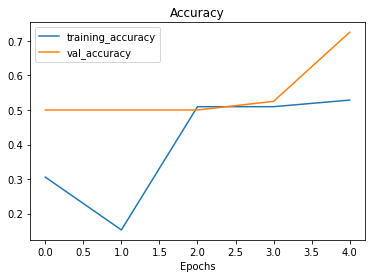

In [27]:
# Check model's performance history training on augmented data
plot_loss_curves(history_4)

In [28]:
# Shuffle the augmented training data
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

Found 157 images belonging to 2 classes.


In [29]:
# Create the model 
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_5 = model_5.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
5/5 [==============================] - 17s 3s/step - loss: 0.7001 - accuracy: 0.4204 - val_loss: 0.6983 - val_accuracy: 0.4750
Epoch 2/5
5/5 [==============================] - 14s 3s/step - loss: 0.6936 - accuracy: 0.4904 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 3/5
5/5 [==============================] - 14s 3s/step - loss: 0.6865 - accuracy: 0.5159 - val_loss: 0.6886 - val_accuracy: 0.5000
Epoch 4/5
5/5 [==============================] - 14s 3s/step - loss: 0.6761 - accuracy: 0.5732 - val_loss: 0.6690 - val_accuracy: 0.6250
Epoch 5/5
5/5 [==============================] - 14s 3s/step - loss: 0.6543 - accuracy: 0.6688 - val_loss: 0.6344 - val_accuracy: 0.7000


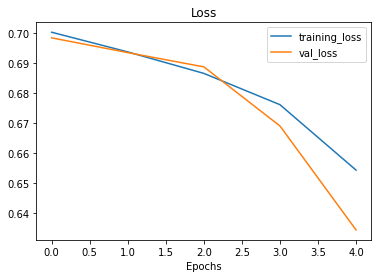

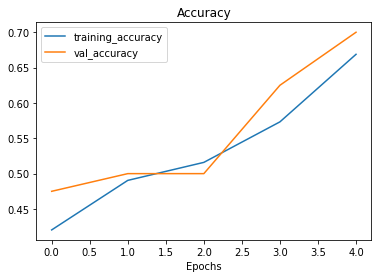

In [30]:
# Check model's performance history training on augmented data
plot_loss_curves(history_5)

In [31]:
# Create a CNN model (same as Tiny VGG but for binary classification - https://poloclub.github.io/cnn-explainer/ )
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
5/5 [==============================] - 22s 4s/step - loss: 0.7510 - accuracy: 0.5223 - val_loss: 0.7297 - val_accuracy: 0.5000
Epoch 2/5
5/5 [==============================] - 20s 4s/step - loss: 0.6979 - accuracy: 0.5159 - val_loss: 0.6940 - val_accuracy: 0.4750
Epoch 3/5
5/5 [==============================] - 20s 4s/step - loss: 0.6923 - accuracy: 0.5414 - val_loss: 0.6896 - val_accuracy: 0.5000
Epoch 4/5
5/5 [==============================] - 20s 4s/step - loss: 0.6893 - accuracy: 0.5223 - val_loss: 0.6847 - val_accuracy: 0.5500
Epoch 5/5
5/5 [==============================] - 20s 4s/step - loss: 0.6823 - accuracy: 0.5287 - val_loss: 0.6780 - val_accuracy: 0.5500


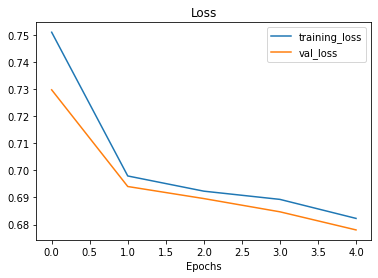

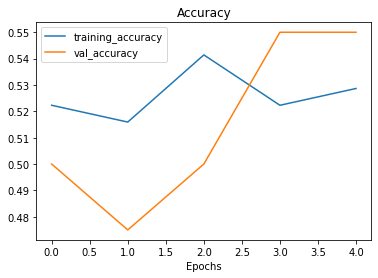

In [32]:
# Check model's performance history training on augmented data
plot_loss_curves(history_6)

## Transfer Learning

In [33]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [34]:
# Create tensorboard callback (funtionized because need to create a new one for each model)
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir = log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [35]:
# Resnet 50 V2 feature vector
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

In [36]:
#IMAGE_SHAPE+(3,)

In [37]:
# Let's make a create_model function to create a model from a URL
IMAGE_SHAPE = (224, 224)  # generally if name is all capital, indicates hyperparameter
BATCH_SIZE = 32


def create_model(model_url, num_classes=2):
  """Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.
  
  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in output layer,
      should be equal to number of target classes, default 2.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature
    extractor layer and Dense output layer with num_classes outputs.
  """
  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False,     # freeze the underlying patterns
                                           name='feature_extraction_layer',
                                           input_shape=IMAGE_SHAPE+(3,))  # define the input shape

  # Create our own model
  model = tf.keras.Sequential([
      feature_extractor_layer,    # use the feature extraction layer as the base
      layers.Dense(1, activation='sigmoid', name='output_layer')   # create our own ouput layer
      ]) 

  return model  

In [38]:
# Create model
resnet_model = create_model(resnet_url, num_classes=train_data.num_classes)

# Compile
resnet_model.compile(loss='binary_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [39]:
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255) 

# Setup the train and test directories
train_dir = '/content/drive/MyDrive/Colab Notebooks/IBM PyTorch/final_model/model2/images_dir/train/'
test_dir = '/content/drive/MyDrive/Colab Notebooks/IBM PyTorch/final_model/model2/images_dir/test/'

# Import data from directories and turn it into batches
# Import data from diectories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=BATCH_SIZE,
                                               target_size=IMAGE_SHAPE,
                                               class_mode="binary")

test_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=BATCH_SIZE,
                                               target_size=IMAGE_SHAPE,
                                               class_mode="binary")

Found 157 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [40]:
# Fit the model
resnet_history = resnet_model.fit(train_data,
                                  epochs=5,
                                  steps_per_epoch=len(train_data),
                                  validation_data=test_data,
                                  validation_steps=len(test_data),
                                  
                                  # Add TensorBoard callback to model (callbacks parameter takes a list)
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",   # save experiment logs here
                                             experiment_name="resnet50V2")]) 

Saving TensorBoard log files to: tensorflow_hub/resnet50V2/20220531-032714
Epoch 1/5
5/5 [==============================] - 44s 8s/step - loss: 0.6465 - accuracy: 0.6497 - val_loss: 0.4841 - val_accuracy: 0.8000
Epoch 2/5
5/5 [==============================] - 36s 8s/step - loss: 0.4418 - accuracy: 0.8280 - val_loss: 0.3575 - val_accuracy: 0.9000
Epoch 3/5
5/5 [==============================] - 36s 8s/step - loss: 0.3260 - accuracy: 0.9045 - val_loss: 0.2833 - val_accuracy: 0.9000
Epoch 4/5
5/5 [==============================] - 34s 7s/step - loss: 0.2669 - accuracy: 0.9299 - val_loss: 0.2453 - val_accuracy: 0.9500
Epoch 5/5
5/5 [==============================] - 36s 7s/step - loss: 0.2214 - accuracy: 0.9427 - val_loss: 0.2257 - val_accuracy: 0.9500


In [41]:
resnet_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 2048)             23564800  
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 1)                 2049      
                                                                 
Total params: 23,566,849
Trainable params: 2,049
Non-trainable params: 23,564,800
_________________________________________________________________


In [42]:
import matplotlib.pyplot as plt

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

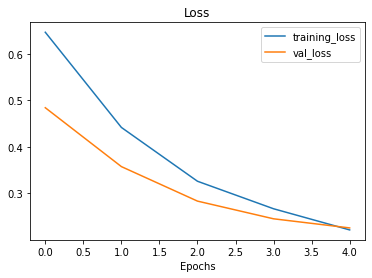

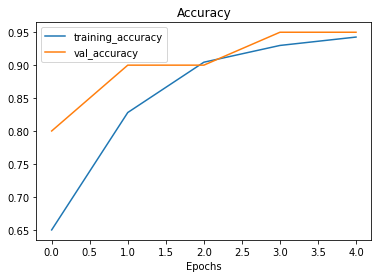

In [43]:
plot_loss_curves(resnet_history)

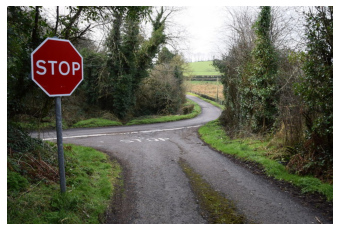

In [44]:
# Test an unseen image
stop1 = mpimg.imread('/content/drive/MyDrive/Colab Notebooks/IBM PyTorch/final_model/model2/test_set_stop_not_stop/stop_4.jpeg')
plt.imshow(stop1)
plt.axis(False);

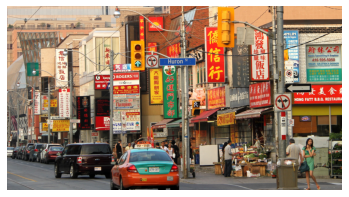

In [45]:
nostop1 = mpimg.imread('/content/drive/MyDrive/Colab Notebooks/IBM PyTorch/final_model/model2/test_set_stop_not_stop/not_stop_1.jpeg')
plt.imshow(nostop1)
plt.axis(False);

In [46]:
# Create a function to import an image and resize it to be able to be used with our modle
def load_and_prep_image(filename, img_shape=224):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.image.decode_jpeg(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [47]:
stop1 = load_and_prep_image('/content/drive/MyDrive/Colab Notebooks/IBM PyTorch/final_model/model2/test_set_stop_not_stop/stop_4.jpeg')
stop1 = tf.expand_dims(stop1, axis=0)

In [48]:
# Make a prediction on custom image tensor
pred = resnet_model.predict(stop1)
pred

array([[0.9883537]], dtype=float32)

In [49]:
# Remind ourselves of our class names
class_names

array(['not_stop', 'stop'], dtype='<U8')

In [50]:
# Remind ourselves of our class names
class_names[int(tf.round(pred)[0][0])]

'stop'

In [51]:
nostop1 = load_and_prep_image('/content/drive/MyDrive/Colab Notebooks/IBM PyTorch/final_model/model2/test_set_stop_not_stop/not_stop_1.jpeg')
nostop1 = tf.expand_dims(nostop1, axis=0)
pred = resnet_model.predict(nostop1)
pred

array([[0.02598482]], dtype=float32)

In [52]:
class_names[int(tf.round(pred)[0][0])]

'not_stop'

## Save Model

In [53]:
#file_dir = '/content/drive/MyDrive/Colab Notebooks/IBM PyTorch/final_model/model2/resnet_stop_model.h5'
#resnet_model.save(file_dir)

In [54]:
#resnet_model.save("/content/drive/MyDrive/Colab Notebooks/IBM PyTorch/final_model/model2/resnet_stop_model")

In [55]:
# Load in a model and evaluate it
#loaded_model_11 = tf.keras.models.load_model("saved_trained_model")
#loaded_model_11.evaluate(test_data)